# Titanic_practice

## 처음시도

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [3]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
# null값 age:117, Embarked:2  
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

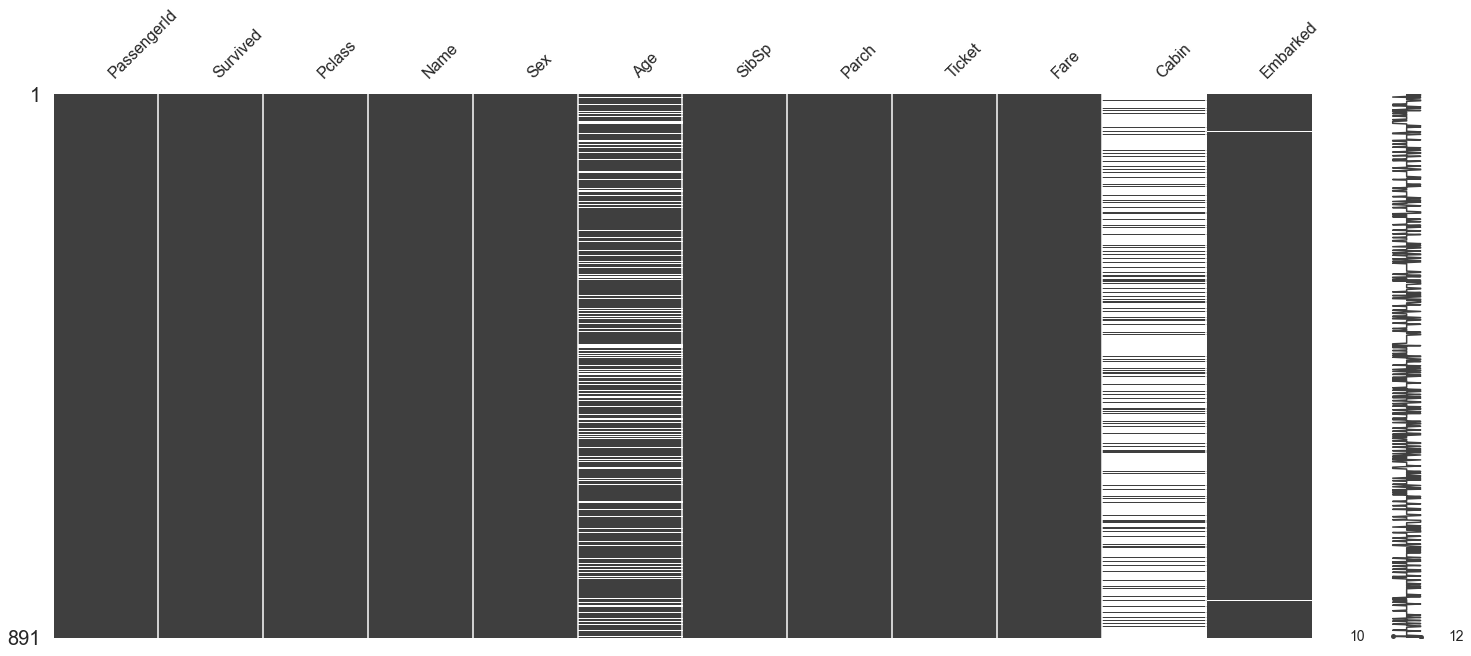

In [20]:
# Nan값 시각화
msno.matrix(df)

In [ ]:
# SibSp, Parch, Fare 데이터 이해 부족
# Age, Fare 데이터의 카테고리가 너무 많음
# Name,Ticket 사용 x

## 고려할 사항
* 'Age'의 Nan값을 어떻게 처리할 것인가
* 'Age', 'Fare' 데이터의 카테고리를 어떻게 처리할 것인가
* 'Fare' 값을 그냥 넣을것인가?
* 'SibSp','Parch' 모르는 성질의 데이터를 어떻게 할 것인가

### 'Age' 열 관찰하기

In [23]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
# 나이가 0보다 작은 데이터들 존재
df['Age'].sort_values()
# .value_counts()

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64

In [29]:
# 의미있어보임
df[df['Age']<=1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [38]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

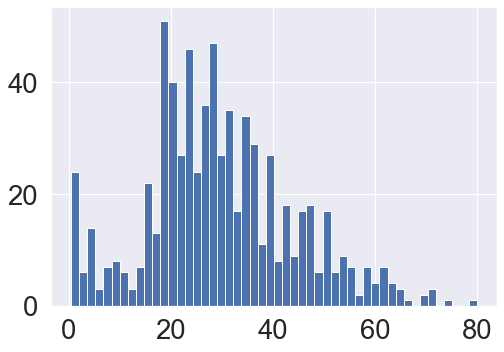

In [39]:
df['Age'].hist(bins=50)

<AxesSubplot:xlabel='Age', ylabel='Density'>

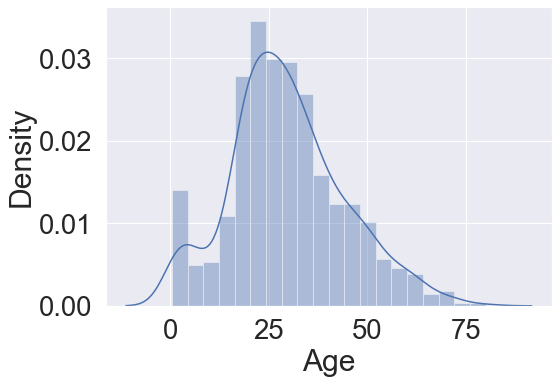

In [45]:
sns.distplot(df['Age'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x191027dc700>,
 'caps': [<matplotlib.lines.Line2D at 0x191027dc7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x191027dcbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x191001864c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19100186820>],
 'means': []}

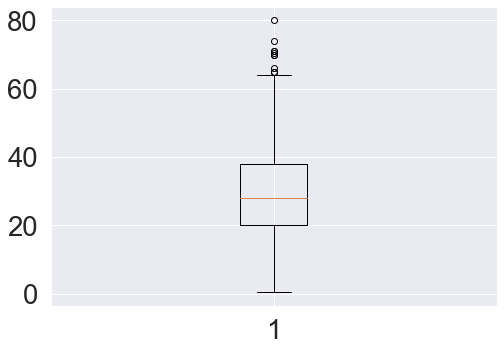

In [41]:
# boxplot
plt.boxplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age'>

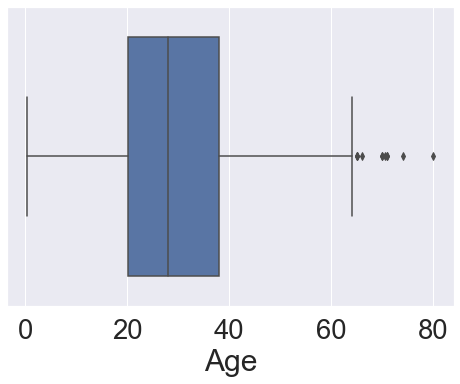

In [42]:
sns.boxplot(df['Age'].dropna())

### Fare 살펴보기

In [22]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

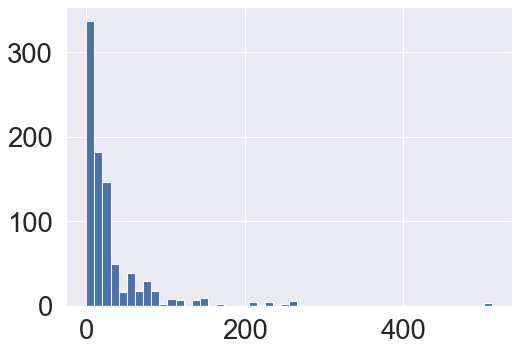

In [33]:
df['Fare'].hist(bins=50)